In [1]:
import json
import itertools
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
with open('squad-dev-v1.1.json') as json_file:  
    data = json.load(json_file)
data = pd.DataFrame.from_dict(data)
df = pd.DataFrame.from_dict(data['data'])

SQuAD (Rajpurkar et al., 2016): this dataset
included Wikipedia articles involving various topics, with the articles being divided into paragraphs.
We randomly chose 100 paragraphs from 15 articles and used only one question from each paragraph for the annotation.

In [240]:
with open('squad.json') as json_file:  
    annotated = json.load(json_file)
annotated = pd.DataFrame.from_dict(annotated)
annotated.head()

,annotations,id,original_id
0,"[{'skills': [8, 9, 2], 'sents_indices': [[19, ...",squad_000,57309921396df919000961f8
1,"[{'skills': [2], 'sents_indices': [[58, 71]], ...",squad_001,5730cc2cb54a4f140068cc68
2,"[{'skills': [13], 'sents_indices': [[105, 119]...",squad_002,5730d523aca1c71400fe5b03
3,"[{'skills': [13], 'sents_indices': [[32, 46], ...",squad_003,5730d77ef6cb411900e244de
4,"[{'skills': [8], 'sents_indices': [[77, 108]],...",squad_004,5730b2312461fd1900a9cfaf


In [7]:
annotated['annotations'][0]

[{'skills': [8, 9, 2],
  'sents_indices': [[19, 52]],
  'skill_count': 3,
  'nonsense': False}]

In [241]:
# Add columns to annotated: topic, paragraph, question, answer

# for each topic
ids = []
topics = []
paragraphs = []
questions =[]
answers = []
answer_starts = []
for a in annotated.index:
    original_id = annotated.at[a,'original_id']
    for i in range(48):
        # for each paragraph
        for j in range(len(df['data'][i]['paragraphs'])):
            for k in range(len(df['data'][i]['paragraphs'][j]['qas'])):
                id_num = df['data'][i]['paragraphs'][j]['qas'][k]['id']
                if original_id==id_num:
                    annotated.at[a, 'topic'] = df['data'][i]['title']
                    annotated.at[a, 'paragraph'] = df['data'][i]['paragraphs'][j]['context']
                    annotated.at[a, 'question'] = df['data'][i]['paragraphs'][j]['qas'][k]['question']
                    annotated.at[a, 'answer'] = df['data'][i]['paragraphs'][j]['qas'][k]['answers'][0]['text']
                    annotated.at[a, 'answer_start'] = df['data'][i]['paragraphs'][j]['qas'][k]['answers'][0]['answer_start']
                    ids.append(id_num)
                





In [105]:
annotated.head()

,annotations,id,original_id,topic,paragraph,question,answer,answer_start
0,"[{'skills': [8, 9, 2], 'sents_indices': [[19, ...",squad_000,57309921396df919000961f8,United_Methodist_Church,The movement which would become The United Met...,"Why was the student group called ""the Methodis...",being methodical and exceptionally detailed in...,411.0
1,"[{'skills': [2], 'sents_indices': [[58, 71]], ...",squad_001,5730cc2cb54a4f140068cc68,United_Methodist_Church,"Throughout its history, the United Methodist C...",Most schools established by the UMC are member...,International Association of Methodist-related...,458.0
2,"[{'skills': [13], 'sents_indices': [[105, 119]...",squad_002,5730d523aca1c71400fe5b03,United_Methodist_Church,"Deacons are called by God, affirmed by the chu...",Deacons serve a term of how many years as prov...,2–3 years,670.0
3,"[{'skills': [13], 'sents_indices': [[32, 46], ...",squad_003,5730d77ef6cb411900e244de,United_Methodist_Church,The United Methodist Church (UMC) practices in...,Name one way in which a person can become a Pr...,transfer from another Christian denomination,511.0
4,"[{'skills': [8], 'sents_indices': [[77, 108]],...",squad_004,5730b2312461fd1900a9cfaf,United_Methodist_Church,Members of the United Methodist Church who ide...,Who is the president of TUMAS?,Rev. Paul T. Stallsworth,507.0


In [108]:
len(ids)

100

In [107]:
#Check for nulls
annotated.isnull().sum()

annotations     0
id              0
original_id     0
topic           0
paragraph       0
question        0
answer          0
answer_start    0
dtype: int64

In [242]:
skills = []
sent_ind = []
skill_count = []
nonsense = []
for row in annotated['annotations']:
    skills.append(row[0]['skills'])
    sent_ind.append(row[0]['sents_indices'])
    skill_count.append(row[0]['skill_count'])
    nonsense.append(row[0]['nonsense'])

In [243]:
annotated['skills'] = skills
annotated['sent_indices'] = sent_ind
annotated['skill_count'] = skill_count
annotated['nonsense'] = nonsense

# EDA 

In [112]:
print('# of topics: ' + str(len(annotated.topic.unique())))
for t in annotated.topic.unique():
    print(str(t) + ': ' + str(len(annotated[annotated['topic']==t])))

# of topics: 15
United_Methodist_Church: 12
Victoria_and_Albert_Museum: 7
Pharmacy: 5
Scottish_Parliament: 7
Ctenophora: 16
Steam_engine: 3
University_of_Chicago: 7
Rhine: 4
Geology: 3
American_Broadcasting_Company: 1
European_Union_law: 8
Huguenot: 9
Southern_California: 7
Construction: 5
Immune_system: 6


In [127]:
annotated.at[8,'annotations']
# Sentence indices represent the first word of the sentence 
# the answer belongs to and the first word of the sentence that follows

[{'skills': [8, 2, 11, 12],
  'sents_indices': [[0, 87]],
  'skill_count': 4,
  'nonsense': False}]

In [119]:
annotated.at[1,'paragraph']

'Throughout its history, the United Methodist Church has placed great emphasis on the importance of education. As such, the United Methodist Church established and is affiliated with around one hundred colleges and universities in the United States, including Syracuse University, Boston University, Emory University, Duke University, Drew University, University of Denver, University of Evansville, and Southern Methodist University. Most are members of the International Association of Methodist-related Schools, Colleges, and Universities. The church operates three hundred sixty schools and institutions overseas.'

In [120]:
print(annotated.at[1,'question'])
print(annotated.at[1,'answer'])

Most schools established by the UMC are members of what group?
International Association of Methodist-related Schools, Colleges, and Universities


In [160]:
print(annotated.at[1,'answer_start'])
print(annotated.at[1,'paragraph'][458:])

458.0
International Association of Methodist-related Schools, Colleges, and Universities. The church operates three hundred sixty schools and institutions overseas.


In [125]:
annotated.at[1,'paragraph'].split(' ')[58]

'Most'

In [126]:
annotated.at[1,'paragraph'].split(' ')[71]

'The'

### Average Counts

In [138]:
p_count=0
sum_wc=0
for p in annotated['paragraph']:
    p_count +=1
    sum_wc += len(p.lower().split())
print('Average paragraph length (by word count): ' + str(round(sum_wc/p_count,2)))

Average paragraph length (by word count): 129.26


In [139]:
q_count=0
sum_wc=0
for q in annotated['question']:
    q_count +=1
    sum_wc += len(q.lower().split())
print('Average question length (by word count): ' + str(round(sum_wc/q_count,2)))

Average question length (by word count): 10.02


In [140]:
a_count=0
sum_wc=0
for a in annotated['answer']:
    a_count +=1
    sum_wc += len(a.lower().split())
print('Average answer length (by word count): ' + str(round(sum_wc/a_count,2)))

Average answer length (by word count): 3.9


In [200]:
num_sent = 0
for i in range(100):
    num_sent+=len(annotated.loc[i]['sent_indices'])
print('Average # of sentences needed to answer: ' + str(num_sent/100))

Average # of sentences needed to answer: 1.04


In [211]:
answer_start = 0
for i in range(100):
    answer_start+=annotated.loc[i]['answer_start']
print('Average answer start: ' + str(answer_start/100))

Average answer start: 400.36


### Nonsense

In [148]:
annotated[annotated['nonsense']==True]['topic']

52            University_of_Chicago
64    American_Broadcasting_Company
82              Southern_California
Name: topic, dtype: object

In [155]:
print(annotated[annotated['nonsense']==True].loc[52]['question'])
print('\n')
print(annotated[annotated['nonsense']==True].loc[52]['answer'])
print('\n')
print(annotated[annotated['nonsense']==True].loc[52]['paragraph'])


What cancer researchers were also apart of the university's faculty?


Charles Brenton Huggins and Janet Rowley


Past faculty have also included Egyptologist James Henry Breasted, mathematician Alberto Calderón, Nobel prize winning economist and classical liberalism defender Friedrich Hayek, meteorologist Ted Fujita, chemists Glenn T. Seaborg, the developer of the actinide concept and Nobel Prize winner Yuan T. Lee, Nobel Prize winning novelist Saul Bellow, political philosopher and author Allan Bloom, cancer researchers Charles Brenton Huggins and Janet Rowley, astronomer Gerard Kuiper, one of the most important figures in the early development of the discipline of linguistics Edward Sapir, and the founder of McKinsey & Co., James O. McKinsey.


In [156]:
print(annotated[annotated['nonsense']==True].loc[64]['question'])
print('\n')
print(annotated[annotated['nonsense']==True].loc[64]['answer'])
print('\n')
print(annotated[annotated['nonsense']==True].loc[64]['paragraph'])


ABC had secondary status on the existing stations in what Ohio town?


Youngstown


As a result, with the exception of the largest markets, ABC was relegated to secondary status on one or both of the existing stations, usually via off-hours clearances (a notable exception during this time was WKST-TV in Youngstown, Ohio, now WYTV, despite the small size of the surrounding market and its close proximity to Cleveland and Pittsburgh even decades before the city's economic collapse). According to Goldenson, this meant that an hour of ABC programming reported five times lower viewership than its competitors. However, the network's intake of money at the time would allow it to accelerate its content production. Still, ABC's limited reach would continue to hobble it for the next two decades; several smaller markets would not grow large enough to support a full-time ABC affiliate until the 1960s, with some very small markets having to wait as late as the 1980s or even the advent of digital tel

In [157]:
print(annotated[annotated['nonsense']==True].loc[82]['question'])
print('\n')
print(annotated[annotated['nonsense']==True].loc[82]['answer'])
print('\n')
print(annotated[annotated['nonsense']==True].loc[82]['paragraph'])


The region spans starting at islands found in which body of water?


Pacific Ocean


Southern California consists of one of the more varied collections of geologic, topographic, and natural ecosystem landscapes in a diversity outnumbering other major regions in the state and country. The region spans from Pacific Ocean islands, shorelines, beaches, and coastal plains, through the Transverse and Peninsular Ranges with their peaks, into the large and small interior valleys, to the vast deserts of California.


### Skills

In [185]:
# 0-5 skills per questions
annotated['skill_count'].describe()

count    100.000000
mean       1.290000
std        1.183173
min        0.000000
25%        0.000000
50%        1.000000
75%        2.000000
max        5.000000
Name: skill_count, dtype: float64

In [192]:
from collections import Counter
flat_list = [item for sublist in list(annotated['skills']) for item in sublist]
print('Most common skills required: ' + str(Counter(flat_list).most_common(5)))

Most common skills required: [(8, 42), (11, 28), (13, 27), (12, 25), (9, 13)]


- 8. Ellipsis†: recognizing implicit/omitted information (argument, predicate, quantifier, time, or place). This skill is inspired by Dagan et al. (2013) and the discussion in Sugawara et al. (2017).
- 11. Meta-knowledge† : using knowledge that includes a reader, writer, or text genre (e.g., narratives and expository documents) from metaviewpoints (e.g., Who are the principal characters of the story? 
- 13. Punctuation∗: understanding of punctuation marks (e.g., parenthesis, dash, quotation, colon, or semicolon).
- 12. Schematic clause relation: understanding of complex sentences that have coordination or subordination, including relative clauses.
- 9. Bridging†: inference supported by grammatical and lexical knowledge (e.g., synonymy, hypernymy, thematic role, part of events, idioms, and apposition)

In [195]:
least_common = Counter(flat_list).most_common()[-5:]
print('Least common skills required: ' + str(least_common))

Least common skills required: [(2, 13), (0, 3), (7, 3), (14, 3), (6, 2)]


- 2. Mathematical reasoning∗: we merged statistical and quantitative reasoning with mathematical reasoning
- 0. ?
- 7. Spatiotemporal relation: understanding of spatial and/or temporal relationships between multiple entities, events, and states.
- 14 may be indication of nonsense
- 6. Causal relation: understanding of causality that is represented by explicit expressions such as “why,” “because,” and “the reason for” (only if they exist).

In [202]:
annotated[annotated['skill_count']==0]
# 0 skill count is associated with skill 13 or 14

,annotations,id,original_id,topic,paragraph,question,answer,answer_start,skills,sent_indices,skill_count,nonsense
2,"[{'skills': [13], 'sents_indices': [[105, 119]...",squad_002,5730d523aca1c71400fe5b03,United_Methodist_Church,"Deacons are called by God, affirmed by the chu...",Deacons serve a term of how many years as prov...,2–3 years,670.0,[13],"[[105, 119]]",0,False
3,"[{'skills': [13], 'sents_indices': [[32, 46], ...",squad_003,5730d77ef6cb411900e244de,United_Methodist_Church,The United Methodist Church (UMC) practices in...,Name one way in which a person can become a Pr...,transfer from another Christian denomination,511.0,[13],"[[32, 46], [69, 82]]",0,False
10,"[{'skills': [13], 'sents_indices': [[36, 51]],...",squad_010,5730c52fb54a4f140068cc46,United_Methodist_Church,"Like other historic Christian churches, The Un...",In what country does some clergy in the UMC oc...,Africa,346.0,[13],"[[36, 51]]",0,False
14,"[{'skills': [13], 'sents_indices': [[62, 74]],...",squad_014,5726cc11dd62a815002e9089,Victoria_and_Albert_Museum,Writers whose papers are in the library are as...,What does the Armagnac manuscript in the V&A l...,the trial and rehabilitation of Joan of Arc,432.0,[13],"[[62, 74]]",0,False
15,"[{'skills': [13], 'sents_indices': [[19, 40]],...",squad_015,5726e680dd62a815002e9470,Victoria_and_Albert_Museum,The Soulages collection of Italian and French ...,What items comprise the John Jones Collection?,French 18th-century art and furnishings,161.0,[13],"[[19, 40]]",0,False
17,"[{'skills': [13], 'sents_indices': [[0, 8]], '...",squad_017,5726f1ec708984140094d6a9,Victoria_and_Albert_Museum,The Musical Instruments gallery closed 25 Febr...,In which year was the Musical Instruments gall...,2010,51.0,[13],"[[0, 8]]",0,False
23,"[{'skills': [13], 'sents_indices': [[45, 50]],...",squad_023,5726f2375951b619008f8313,Pharmacy,Pharmacy informatics is the combination of pha...,How fast is pharmacy informatics growing?,quickly,366.0,[13],"[[45, 50]]",0,False
25,"[{'skills': [13], 'sents_indices': [[0, 15]], ...",squad_025,572fdb17b2c2fd140056851d,Scottish_Parliament,"As in the House of Commons, a number of qualif...",What does being an MSP share with the House of...,a number of qualifications,28.0,[13],"[[0, 15]]",0,False
28,"[{'skills': [13], 'sents_indices': [[20, 28]],...",squad_028,572fd8efb2c2fd14005684fa,Scottish_Parliament,"Of the 129 MSPs, 73 are elected to represent f...",How many members can voters choose to represen...,one,132.0,[13],"[[20, 28]]",0,False
30,"[{'skills': [13], 'sents_indices': [[120, 136]...",squad_030,572fbb04a23a5019007fc8fa,Scottish_Parliament,As a member of the Scottish Parliamentary Corp...,Who represents the Scottish Parliament at home...,The Presiding Officer,778.0,[13],"[[120, 136]]",0,False


13. Punctuation∗: understanding of punctuation marks (e.g., parenthesis, dash, quotation, colon, or semicolon).

### Find rows with 0 as a skill

In [204]:
for row in range(100):
    if 0 in annotated.loc[row]['skills']:
        print(row)

16
26
57


In [208]:
print(annotated.loc[16]['question'])
print('\n')
print(annotated.loc[16]['answer'])
print('\n')
print(annotated.loc[16]['paragraph'])


Who purchased or commissioned the works of European artists included the British galleries of the V&A?


British patrons


Not only the work of British artists and craftspeople is on display, but also work produced by European artists that was purchased or commissioned by British patrons, as well as imports from Asia, including porcelain, cloth and wallpaper. Designers and artists whose work is on display in the galleries include Gian Lorenzo Bernini, Grinling Gibbons, Daniel Marot, Louis Laguerre, Antonio Verrio, Sir James Thornhill, William Kent, Robert Adam, Josiah Wedgwood, Matthew Boulton, Canova, Thomas Chippendale, Pugin, William Morris. Patrons who have influenced taste are also represented by works of art from their collections, these include: Horace Walpole (a major influence on the Gothic Revival), William Thomas Beckford and Thomas Hope.


In [209]:
print(annotated.loc[26]['question'])
print('\n')
print(annotated.loc[26]['answer'])
print('\n')
print(annotated.loc[26]['paragraph'])


Most aspects of transport safety is a subject dealt with by whom?


UK Government ministers


Reserved matters are subjects that are outside the legislative competence of the Scotland Parliament. The Scottish Parliament is unable to legislate on such issues that are reserved to, and dealt with at, Westminster (and where Ministerial functions usually lie with UK Government ministers). These include abortion, broadcasting policy, civil service, common markets for UK goods and services, constitution, electricity, coal, oil, gas, nuclear energy, defence and national security, drug policy, employment, foreign policy and relations with Europe, most aspects of transport safety and regulation, National Lottery, protection of borders, social security and stability of UK's fiscal, economic and monetary system.


In [210]:
print(annotated.loc[57]['question'])
print('\n')
print(annotated.loc[57]['answer'])
print('\n')
print(annotated.loc[57]['paragraph'])


What part of the Rhine flows west at Katwijk?


Old Rhine


The name Rijn, from here on, is used only for smaller streams farther to the north, which together formed the main river Rhine in Roman times. Though they retained the name, these streams no longer carry water from the Rhine, but are used for draining the surrounding land and polders. From Wijk bij Duurstede, the old north branch of the Rhine is called Kromme Rijn ("Bent Rhine") past Utrecht, first Leidse Rijn ("Rhine of Leiden") and then, Oude Rijn ("Old Rhine"). The latter flows west into a sluice at Katwijk, where its waters can be discharged into the North Sea. This branch once formed the line along which the Limes Germanicus were built. During periods of lower sea levels within the various ice ages, the Rhine took a left turn, creating the Channel River, the course of which now lies below the English Channel.


### Plots

Text(0.5, 1.0, 'Counts by Title')

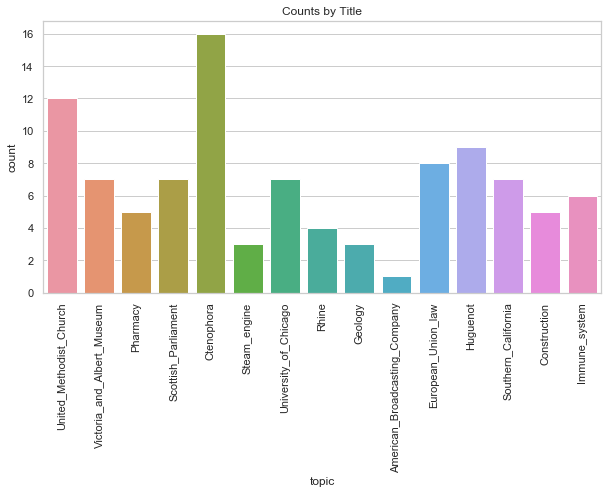

In [217]:
sns.set(style="whitegrid")
#fig, ax =plt.subplots(ncols=3, figsize=(20, 5))
fig, ax =plt.subplots(figsize=(10, 5))
plot1 = sns.countplot(x="topic",data=annotated)
loc, labels = plt.xticks()
plot1.set_xticklabels(labels, rotation=90)
plot1.set_title('Counts by Title')

Text(0.5, 1.0, 'Counts by Nonsense')

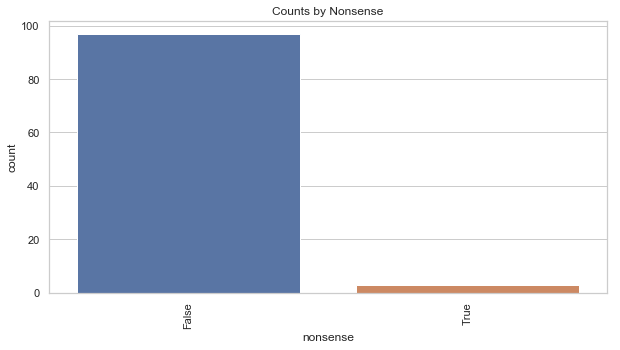

In [218]:
sns.set(style="whitegrid")
#fig, ax =plt.subplots(ncols=3, figsize=(20, 5))
fig, ax =plt.subplots(figsize=(10, 5))
plot1 = sns.countplot(x="nonsense",data=annotated)
loc, labels = plt.xticks()
plot1.set_xticklabels(labels, rotation=90)
plot1.set_title('Counts by Nonsense')

Text(0.5, 1.0, 'Counts by Skill Count')

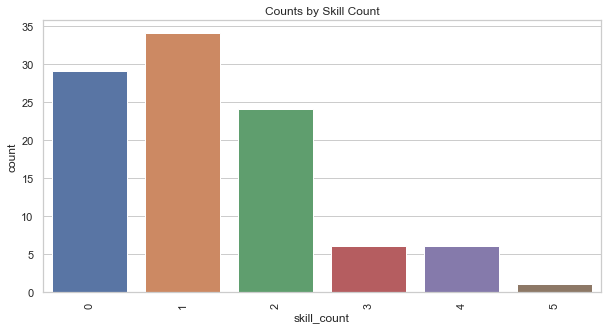

In [220]:
sns.set(style="whitegrid")
#fig, ax =plt.subplots(ncols=3, figsize=(20, 5))
fig, ax =plt.subplots(figsize=(10, 5))
plot1 = sns.countplot(x="skill_count",data=annotated)
loc, labels = plt.xticks()
plot1.set_xticklabels(labels, rotation=90)
plot1.set_title('Counts by Skill Count')

### Common skills seen together

In [251]:
import collections
two = annotated[annotated['skill_count']==2]
sets = list(two['skills'])
pair_dict = collections.defaultdict(int)
for s in range(len(sets)):
    pair = sets[s]
    pair_dict[str(pair)]+=1
pair_dict

defaultdict(int,
            {'[11, 12]': 3,
             '[0, 11]': 1,
             '[11, 6]': 1,
             '[9, 11]': 2,
             '[8, 12]': 8,
             '[8, 7]': 1,
             '[8, 11]': 4,
             '[11, 7]': 1,
             '[8, 2]': 1,
             '[9, 2]': 1,
             '[8, 9]': 1})

- 8. Ellipsis†: recognizing implicit/omitted information (argument, predicate, quantifier, time, or place). This skill is inspired by Dagan et al. (2013) and the discussion in Sugawara et al. (2017).

- 12. Schematic clause relation: understanding of complex sentences that have coordination or subordination, including relative clauses.

In [252]:
three = annotated[annotated['skill_count']==3]
sets_3 = list(three['skills'])
sets_3

[[8, 9, 2], [8, 2, 11], [8, 11, 7], [8, 2, 12], [8, 9, 2], [0, 8, 12]]

### Sample 4-skill Question

In [253]:
four = annotated[annotated['skill_count']==4]
sets_4 = list(four['skills'])
sets_4

[[8, 9, 11, 12],
 [8, 2, 11, 12],
 [8, 2, 11, 12],
 [8, 2, 11, 12],
 [8, 2, 11, 12],
 [8, 2, 11, 12]]

In [258]:
print(annotated.loc[9]['question'])
print('\n')
print(annotated.loc[9]['answer'])
print('\n')
print(annotated.loc[9]['paragraph'])


Who was one man who joined hands and said "Lord of the Church, we are united in Thee...?"


Bishop Lloyd Christ Wicke


On April 23, 1968, the United Methodist Church was created when the Evangelical United Brethren Church (represented by Bishop Reuben H. Mueller) and The Methodist Church (represented by Bishop Lloyd Christ Wicke) joined hands at the constituting General Conference in Dallas, Texas. With the words, "Lord of the Church, we are united in Thee, in Thy Church and now in The United Methodist Church" the new denomination was given birth by the two churches that had distinguished histories and influential ministries in various parts of the world.


- 8. Ellipsis†: recognizing implicit/omitted information (argument, predicate, quantifier, time, or place). This skill is inspired by Dagan et al. (2013) and the discussion in Sugawara et al. (2017).
- 2. Mathematical reasoning∗: we merged statistical and quantitative reasoning with mathematical reasoning
- 11. Meta-knowledge† : using knowledge that includes a reader, writer, or text genre (e.g., narratives and expository documents) from metaviewpoints (e.g., Who are the principal characters of the story? 
- 12. Schematic clause relation: understanding of complex sentences that have coordination or subordination, including relative clauses.

### Sample 5-skill Question

In [254]:
five = annotated[annotated['skill_count']==5]
sets_5 = list(five['skills'])
sets_5

[[0, 9, 2, 11, 12]]

In [256]:
print(annotated.loc[26]['question'])
print('\n')
print(annotated.loc[26]['answer'])
print('\n')
print(annotated.loc[26]['paragraph'])


Most aspects of transport safety is a subject dealt with by whom?


UK Government ministers


Reserved matters are subjects that are outside the legislative competence of the Scotland Parliament. The Scottish Parliament is unable to legislate on such issues that are reserved to, and dealt with at, Westminster (and where Ministerial functions usually lie with UK Government ministers). These include abortion, broadcasting policy, civil service, common markets for UK goods and services, constitution, electricity, coal, oil, gas, nuclear energy, defence and national security, drug policy, employment, foreign policy and relations with Europe, most aspects of transport safety and regulation, National Lottery, protection of borders, social security and stability of UK's fiscal, economic and monetary system.


- 12. Schematic clause relation: understanding of complex sentences that have coordination or subordination, including relative clauses.
- 9. Bridging†: inference supported by grammatical and lexical knowledge (e.g., synonymy, hypernymy, thematic role, part of events, idioms, and apposition)
- 2. Mathematical reasoning∗: we merged statistical and quantitative reasoning with mathematical reasoning
- 11. Meta-knowledge† : using knowledge that includes a reader, writer, or text genre (e.g., narratives and expository documents) from metaviewpoints (e.g., Who are the principal characters of the story? 